# **Preparation Process**


In [4]:
#import libraries
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras
import tensorflow 
from tensorflow.python.keras import regularizers
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
root_path = '/home/lirza/Downloads/eks2rev'
# Declare path each data
train_dir = root_path + '/train'
validation_dir = root_path + '/val'

In [6]:
#Data Augmentation
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    #preprocessing_function = tf.keras.applications.efficientnet.preprocess_input,
    horizontal_flip = True,
    rotation_range = 0.2 ,
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    brightness_range=[0.2,1.2]
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip = True,
    rotation_range = 0.2 ,
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    brightness_range=[0.2,1.2]
)

In [7]:
train_batch_size = 20
val_batch_size = 10

train_images = train_generator.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=train_batch_size,
    shuffle=True,
    seed=42,
)

val_images = train_generator.flow_from_directory(
    directory=validation_dir,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=val_batch_size,
    shuffle=True,
    seed=42,
)

Found 1817 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


# **Training & Evaluation Model Process**

In [8]:
# Input transfer learning model using Efficient Net B0
pretrained_model = tf.keras.applications.EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    drop_connect_rate=0.4,
    pooling='avg'
)

pretrained_model.trainable = False

In [13]:
# Adding more layer in top of based model for fine tuning
inputs = pretrained_model.input

x = tf.keras.layers.Flatten(input_shape=(224, 224, 3))(pretrained_model.output)
x = tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.001))(x)
x = tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001))(x)
x = tf.keras.layers.Dropout(0.5)(x)

outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

TypeError: __init__() missing 2 required positional arguments: 'filters' and 'kernel_size'

In [14]:
# Training process
                              
model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True)


history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=20,
    callbacks=[stopping]
)

Epoch 1/20


2022-05-30 07:01:08.102513: W tensorflow/core/common_runtime/bfc_allocator.cc:462] Allocator (GPU_0_bfc) ran out of memory trying to allocate 30.62MiB (rounded to 32112640)requested by op model/stem_conv/Conv2D
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2022-05-30 07:01:08.102579: I tensorflow/core/common_runtime/bfc_allocator.cc:1010] BFCAllocator dump for GPU_0_bfc
2022-05-30 07:01:08.102589: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (256): 	Total Chunks: 191, Chunks in use: 190. 47.8KiB allocated for chunks. 47.5KiB in use in bin. 8.5KiB client-requested in use in bin.
2022-05-30 07:01:08.102596: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (512): 	Total Chunks: 68, Chunks in use: 68. 42.0KiB allocated for chunks. 42.0KiB in use in bin. 34.6KiB client-requested in use in bin.
2022-05-30 07:

ResourceExhaustedError: Graph execution error:

Detected at node 'model/stem_conv/Conv2D' defined at (most recent call last):
    File "/home/lirza/anaconda3/envs/tfgpu/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/lirza/anaconda3/envs/tfgpu/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/lirza/anaconda3/envs/tfgpu/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/home/lirza/anaconda3/envs/tfgpu/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/home/lirza/anaconda3/envs/tfgpu/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/home/lirza/anaconda3/envs/tfgpu/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/home/lirza/anaconda3/envs/tfgpu/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/home/lirza/anaconda3/envs/tfgpu/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/home/lirza/anaconda3/envs/tfgpu/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/lirza/anaconda3/envs/tfgpu/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "/home/lirza/anaconda3/envs/tfgpu/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "/home/lirza/anaconda3/envs/tfgpu/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 367, in dispatch_shell
      await result
    File "/home/lirza/anaconda3/envs/tfgpu/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "/home/lirza/anaconda3/envs/tfgpu/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/home/lirza/anaconda3/envs/tfgpu/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/lirza/anaconda3/envs/tfgpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2880, in run_cell
      result = self._run_cell(
    File "/home/lirza/anaconda3/envs/tfgpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2935, in _run_cell
      return runner(coro)
    File "/home/lirza/anaconda3/envs/tfgpu/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/lirza/anaconda3/envs/tfgpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3134, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/lirza/anaconda3/envs/tfgpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3337, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/lirza/anaconda3/envs/tfgpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3397, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_49377/1553174305.py", line 13, in <cell line: 13>
      history = model.fit(
    File "/home/lirza/.local/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/lirza/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/lirza/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/home/lirza/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/lirza/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/home/lirza/.local/lib/python3.9/site-packages/keras/engine/training.py", line 859, in train_step
      y_pred = self(x, training=True)
    File "/home/lirza/.local/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/lirza/.local/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/lirza/.local/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/lirza/.local/lib/python3.9/site-packages/keras/engine/functional.py", line 451, in call
      return self._run_internal_graph(
    File "/home/lirza/.local/lib/python3.9/site-packages/keras/engine/functional.py", line 589, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/lirza/.local/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/lirza/.local/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/lirza/.local/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/lirza/.local/lib/python3.9/site-packages/keras/layers/convolutional.py", line 248, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "/home/lirza/.local/lib/python3.9/site-packages/keras/layers/convolutional.py", line 233, in convolution_op
      return tf.nn.convolution(
Node: 'model/stem_conv/Conv2D'
OOM when allocating tensor with shape[20,32,112,112] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node model/stem_conv/Conv2D}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_26751]

In [ ]:
from tensorflow.keras.layers import BatchNormalization
pretrained_model.trainable = True
set_trainable = False

for layer in pretrained_model.layers:
    if layer.name == 'block6d_se_excite':
        set_trainable = True
    if set_trainable:
        if not isinstance(layer, BatchNormalization):
            layer.trainable = True
        else:
            layer.trainable = False
    else:
        layer.trainable = False


model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=10,
    callbacks=[stopping]
)

Epoch 1/10
81/81 [==============================] - 152s 2s/step - loss: 0.3846 - accuracy: 0.9388 - val_loss: 0.4556 - val_accuracy: 0.9200
Epoch 2/10
81/81 [==============================] - 145s 2s/step - loss: 0.3391 - accuracy: 0.9530 - val_loss: 0.5411 - val_accuracy: 0.8700
Epoch 3/10
81/81 [==============================] - 143s 2s/step - loss: 0.3623 - accuracy: 0.9388 - val_loss: 0.5295 - val_accuracy: 0.9150
Epoch 4/10
81/81 [==============================] - 144s 2s/step - loss: 0.3433 - accuracy: 0.9573 - val_loss: 0.4417 - val_accuracy: 0.9150
Epoch 5/10
81/81 [==============================] - 146s 2s/step - loss: 0.3168 - accuracy: 0.9567 - val_loss: 0.6002 - val_accuracy: 0.8900
Epoch 6/10
81/81 [==============================] - 145s 2s/step - loss: 0.3473 - accuracy: 0.9412 - val_loss: 0.5117 - val_accuracy: 0.9050
Epoch 7/10
81/81 [==============================] - 144s 2s/step - loss: 0.3078 - accuracy: 0.9536 - val_loss: 0.5551 - val_accuracy: 0.9100
Epoch 8/10
81

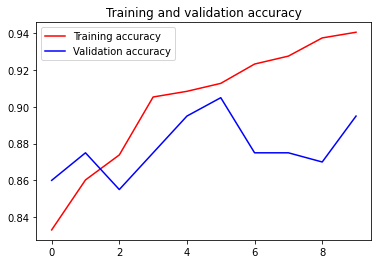

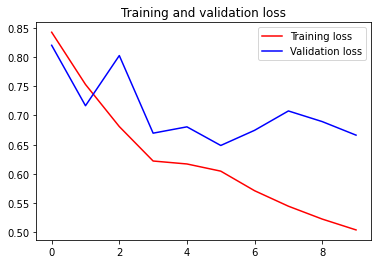

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
!tensorboard dev upload --logdir ./logs \
  --name "Simple experiment with MNIST" \
  --description "Training results from https://colab.sandbox.google.com/github/tensorflow/tensorboard/blob/master/docs/tbdev_getting_started.ipynb" \
  --one_shot
!tensorboard dev list


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=GOPSRONydJDhC9Z5n5QKUBsBNFR4jm&prompt=consent&access_type=offline
Enter 

In [ ]:
batch_size =20
test_score = model.evaluate_generator(test_images, batch_size)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[INFO] accuracy: 86.00%
[INFO] Loss:  0.6300332546234131


In [ ]:
import numpy as np
import itertools
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm = np.around(cm, decimals=2)
    cm[np.isnan(cm)] = 0.0
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [ ]:
y = np.concatenate([test_images.next()[1] for i in range (test_images.__len__())])
true_labels=np.argmax(y, axis=-1)
prediction = model.predict(test_images, verbose=2)
prediction = np.argmax(prediction, axis=-1)

10/10 - 3s - 3s/epoch - 284ms/step


Confusion matrix, without normalization
[[17  0  0  0  1  0  0  1  1  0]
 [ 0 19  0  0  0  0  1  0  0  0]
 [ 0  0 18  0  1  1  0  0  0  0]
 [ 1  1  0 16  1  1  0  0  0  0]
 [ 0  0  0  0 19  0  1  0  0  0]
 [ 0  0  1  0  0 19  0  0  0  0]
 [ 0  0  0  0  1  0 18  1  0  0]
 [ 0  1  0  0  2  0  0 16  1  0]
 [ 0  0  0  1  0  0  0  0 19  0]
 [ 0  0  0  0  0  1  0  0  0 19]]
Accuracy: 0.900
Precision: 0.925
Recall: 0.900
F-Measure: 0.900


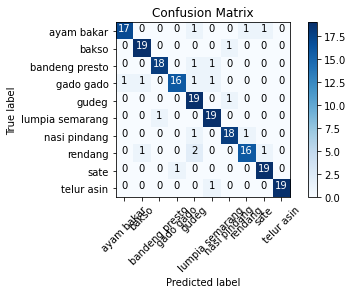

In [ ]:
# confusion matrix
target_names = []
for key in train_images.class_indices:
    target_names.append(key)

cm = confusion_matrix(true_labels, prediction)
plot_confusion_matrix(cm=cm,classes=target_names, title="Confusion Matrix")

from sklearn.metrics import accuracy_score
acc = accuracy_score(true_labels,prediction)
print("Accuracy: %.3f" % acc)

from sklearn.metrics import precision_score
precision = precision_score(true_labels,prediction, labels=[1,2], average='micro')
print("Precision: %.3f" % precision)

#sensitifitas
from sklearn.metrics import recall_score
recall = recall_score(true_labels,prediction, average='micro')
print("Recall: %.3f" % recall)

from sklearn.metrics import f1_score
score = f1_score(true_labels,prediction, average='micro')
print("F-Measure: %.3f" % score)

In [ ]:
# test data file name that false
fnames = test_images.filenames ## fnames is all the filenames/samples used in testing
errors = np.where(prediction != test_images.classes)[0] ## misclassifications done on the test data where y_pred is the predicted values
for i in errors:
    print("The false file : {}".format(fnames[i]))

The false file : ayam bakar/ayam bakar (26) [Original Size].jpg
The false file : ayam bakar/ayam bakar (45) [Original Size].jpg
The false file : ayam bakar/ayam bakar (7) [Original Size].jpg
The false file : bakso/bakso (45) [Original Size].jpg
The false file : bandeng presto/Image_129 [Original Size].jpg
The false file : bandeng presto/Image_89 [Original Size].jpg
The false file : gado gado/gado gado (149) [Original Size].jpg
The false file : gado gado/gado gado (153) [Original Size].jpg
The false file : gado gado/gado gado (178) [Original Size].jpg
The false file : gado gado/gado gado (26) [Original Size].jpg
The false file : gudeg/Image_129 [Original Size].jpg
The false file : lumpia semarang/Image_67 [Original Size].jpg
The false file : nasi pindang/Image_267 [Original Size].jpg
The false file : nasi pindang/Image_74 [Original Size].jpg
The false file : rendang/rendang (153) [Original Size].jpg
The false file : rendang/rendang (212) [Original Size].jpg
The false file : rendang/rend

In [ ]:
# test data file name that true
fnames = test_images.filenames ## fnames is all the filenames/samples used in testing
true_predict = np.where(prediction == test_images.classes)[0] ## true classifications on the test data where y_pred is the predicted values
for i in true_predict :
    print("The true file : {}".format(fnames[i]))

The true file : ayam bakar/ayam bakar (107) [Original Size].jpg
The true file : ayam bakar/ayam bakar (129) [Original Size].jpg
The true file : ayam bakar/ayam bakar (149) [Original Size].jpg
The true file : ayam bakar/ayam bakar (153) [Original Size].jpg
The true file : ayam bakar/ayam bakar (175) [Original Size].jpg
The true file : ayam bakar/ayam bakar (212) [Original Size].jpg
The true file : ayam bakar/ayam bakar (240) [Original Size].jpg
The true file : ayam bakar/ayam bakar (261) [Original Size].jpg
The true file : ayam bakar/ayam bakar (28) [Original Size].jpg
The true file : ayam bakar/ayam bakar (42) [Original Size].jpg
The true file : ayam bakar/ayam bakar (50) [Original Size].jpg
The true file : ayam bakar/ayam bakar (58) [Original Size].jpg
The true file : ayam bakar/ayam bakar (62) [Original Size].jpg
The true file : ayam bakar/ayam bakar (63) [Original Size].jpg
The true file : ayam bakar/ayam bakar (72) [Original Size].jpg
The true file : ayam bakar/ayam bakar (74) [Ori

In [ ]:
val_image_batch, val_label_batch = next(iter(test_images))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)
print(val_image_batch)

Validation batch shape: (20, 224, 224, 3)
[[[[ 58. 136. 120.]
   [ 62. 140. 124.]
   [ 67. 145. 129.]
   ...
   [143. 249. 101.]
   [143. 250. 108.]
   [145. 251. 117.]]

  [[ 57. 135. 119.]
   [ 62. 140. 124.]
   [ 67. 145. 129.]
   ...
   [146. 250. 111.]
   [144. 250. 114.]
   [144. 249. 120.]]

  [[ 57. 135. 119.]
   [ 62. 140. 124.]
   [ 67. 145. 129.]
   ...
   [151. 251. 127.]
   [148. 249. 127.]
   [144. 248. 127.]]

  ...

  [[ 20.  58.  35.]
   [ 20.  58.  35.]
   [ 20.  58.  35.]
   ...
   [ 19.  51.  27.]
   [ 19.  51.  27.]
   [ 19.  51.  27.]]

  [[ 19.  57.  34.]
   [ 19.  57.  34.]
   [ 19.  57.  34.]
   ...
   [ 18.  50.  26.]
   [ 18.  50.  26.]
   [ 18.  50.  26.]]

  [[ 19.  57.  34.]
   [ 19.  57.  34.]
   [ 19.  57.  34.]
   ...
   [ 18.  50.  26.]
   [ 18.  50.  26.]
   [ 18.  50.  26.]]]


 [[[160. 154. 156.]
   [166. 160. 162.]
   [173. 167. 169.]
   ...
   [ 45.  70.  64.]
   [ 83. 106. 100.]
   [108. 130. 127.]]

  [[162. 156. 158.]
   [165. 159. 161.]
   [17

In [ ]:
dataset_labels = sorted(train_images.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Ayam Bakar' 'Bakso' 'Bandeng Presto' 'Gado Gado' 'Gudeg'
 'Lumpia Semarang' 'Nasi Pindang' 'Rendang' 'Sate' 'Telur Asin']


In [ ]:
tf_model_predictions = model.predict(val_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)

Prediction results shape: (20, 10)


In [ ]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
print(predicted_labels)

['Ayam Bakar' 'Ayam Bakar' 'Ayam Bakar' 'Ayam Bakar' 'Ayam Bakar'
 'Ayam Bakar' 'Ayam Bakar' 'Gudeg' 'Ayam Bakar' 'Ayam Bakar' 'Ayam Bakar'
 'Rendang' 'Ayam Bakar' 'Ayam Bakar' 'Ayam Bakar' 'Ayam Bakar' 'Sate'
 'Ayam Bakar' 'Ayam Bakar' 'Ayam Bakar']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction results shape: (20, 10)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

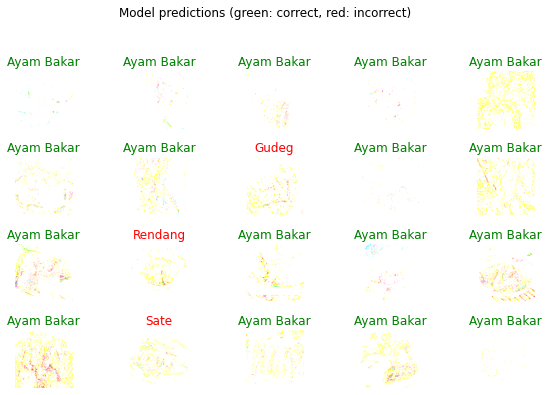

In [ ]:
tf_model_predictions = model.predict(val_image_batch)
print("Prediction results shape: {}".format(tf_model_predictions.shape))
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range((len(predicted_labels))):
 plt.subplot(6,5,n+1)
 plt.imshow(val_image_batch[n])
 color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
 plt.title(predicted_labels[n].title(), color=color)
 plt.axis("off")
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for image_test in uploaded.keys():
  # predicting images
  path = image_test
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  #images = np.vstack([x]) # save image to google colab 
  
  classes = model.predict(x, batch_size=20) # if we use "images = np.vstack([x])" to save test image, in the classes variable replace x with images
  predicted_ids = np.argmax(classes, axis=-1)

  category = ['ayam bakar', 'bakso', 'bandeng presto', 'gado gado', 'gudeg', 'lumpia semarang', 'nasi pindang', 'rendang', 'sate', 'teluar asin']
  result = "{} is {}".format(image_test, category[int(predicted_ids)])
  print(image_test)
  print(int(predicted_ids))
  print(result)

# **Export Model**

In [ ]:
model.save('/content/gdrive/My Drive/Colab Notebooks/food_model.h5')

In [ ]:
#model_dir = '/content/gdrive/My Drive/model/'
#tf.saved_model.save(model, model_dir)

#Masih Error
#model_dir = '/content/gdrive/My Drive/Colab Notebooks/food_model.h5'

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/model/assets


In [ ]:
food_model = tf.keras.models.load_model('/content/gdrive/My Drive/Colab Notebooks/food_model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(food_model)
# Convert the model
#converter = tf.lite.TFLiteConverter.from_saved_model(food_model)
tflite_model = converter.convert()
 
# Save the model.
with open('food_model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpkw7t69cd/assets


INFO:tensorflow:Assets written to: /tmp/tmpkw7t69cd/assets
